<a href="https://colab.research.google.com/github/nicteche/PruebaTia/blob/main/pruebaTecnicaTIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 1 : Manipulacion de Datos
Descripción del conjunto de datos:
1. El conjunto de datos a utilizar será el de “Reconocimiento de actividades humanas y transiciones de postura usando Smartphones Samsung”, disponible en el Repositorio de Machine Learning de UCI: http://archive.ics.uci.edu/dataset/341/smartphone+based+recognition+of+human+ac tivities+and+postural+transitions
2. Este conjunto de datos contiene muestras 10929 muestras, cada una con 561 features/características/atributos/variables, tomadas de 30 sujetos que participaron en el estudio. Los 561 features corresponden a datos de sensores que caracterizan una actividad.
3. El archivo features.txt tiene los nombres de las 561 variables.
4. Los datos de los sujetos están en los archivos: subject_id_train.txt, subject_id_test.txt
5. Los datos de los sensores están en los archivos: x_train.txt, x_test.txt
6. Los datos de la actividad reconocida están en los archivos: y_train.txt, y_test.txt
Dataset "Reconocimiento de actividades humanas y transiciones de postura usando Smartphones Samsung"

**Desarrollo**

1. Cargar los datos de entrenamiento y testeo en una sola estructura de datos que tenga asociado los nombres propios de los features, el sujeto y la actividad reconocida (esta estructura tendrá 563 columnas).

In [2]:
import pandas as pd
import numpy as np

# Cargar los nombres de las características
feature_names = pd.read_csv('/content/drive/MyDrive/PruebaTecnicaTIA/features.txt', delim_whitespace=True, header=None)#Rura features.txt
listName = list(feature_names[0])

# Cargar los conjuntos de datos de entrenamiento y prueba
X_train = pd.read_csv('/content/drive/MyDrive/PruebaTecnicaTIA/Train/X_train.txt', delim_whitespace=True, header=None)#ruta X_Train.txt
X_test = pd.read_csv('/content/drive/MyDrive/PruebaTecnicaTIA/Test/X_test.txt', delim_whitespace=True, header=None)#ruta X_Test.txt

# Asumiendo que 'feature_names' es una lista o serie con los nuevos nombres
X_train.columns = listName
X_test.columns = listName

# Cargar los IDs de los sujetos
subject_train = pd.read_csv('/content/drive/MyDrive/PruebaTecnicaTIA/Train/subject_id_train.txt', header=None, names=['Subject'])#ruta subject_id_train.txt
subject_test = pd.read_csv('/content/drive/MyDrive/PruebaTecnicaTIA/Test/subject_id_test.txt', header=None, names=['Subject'])#ruta subject_id_test.txt

# Cargar las etiquetas de las actividades
y_train = pd.read_csv('/content/drive/MyDrive/PruebaTecnicaTIA/Train/y_train.txt', header=None, names=['Activity'])#ruta y_train.txt
y_test = pd.read_csv('/content/drive/MyDrive/PruebaTecnicaTIA/Test/y_test.txt', header=None, names=['Activity'])#ruta y_test.txt

# Combinar los datos en un solo DataFrame
train_data = pd.concat([subject_train, y_train, X_train], axis=1)
test_data = pd.concat([subject_test, y_test, X_test], axis=1)
full_data = pd.concat([train_data, test_data])

full_data


,Subject,Activity,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,1,5,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,1,5,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,1,5,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,1,5,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,1,5,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,24,2,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,...,0.125445,-0.390349,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104
3158,24,2,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,...,0.150787,-0.336001,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748
3159,24,2,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,...,-0.004765,-0.139894,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527
3160,24,2,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,...,0.013540,-0.224141,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865


2. Muestre estadísticas descriptivas que resuman información sobre los datos.


In [3]:
# Resumen estadístico de los datos
stats = full_data.describe()
print(stats)


            Subject      Activity  tBodyAcc-Mean-1  tBodyAcc-Mean-2  \
count  10929.000000  10929.000000     10929.000000     10929.000000   
mean      16.138348      3.932839         0.039271        -0.000950   
std        8.664537      2.179758         0.101868         0.100673   
min        1.000000      1.000000        -1.000000        -1.000000   
25%        9.000000      2.000000         0.031874        -0.011334   
50%       17.000000      4.000000         0.038939        -0.002859   
75%       24.000000      5.000000         0.043908         0.004553   
max       30.000000     12.000000         1.000000         1.000000   

       tBodyAcc-Mean-3  tBodyAcc-STD-1  tBodyAcc-STD-2  tBodyAcc-STD-3  \
count     10929.000000    10929.000000    10929.000000    10929.000000   
mean         -0.018530       -0.602128       -0.633645       -0.697054   
std           0.088223        0.431281        0.365457        0.311368   
min          -1.000000       -1.000000       -1.000000       -1.

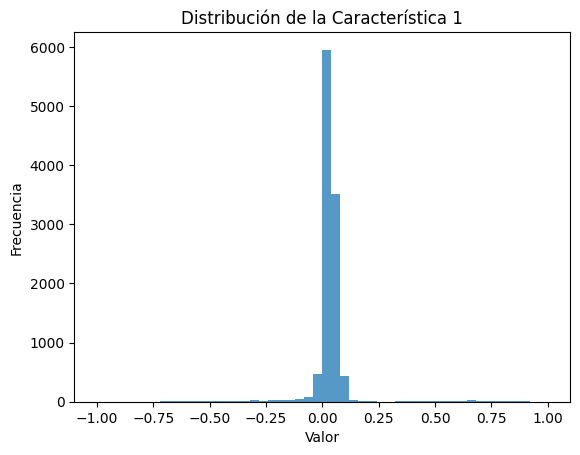

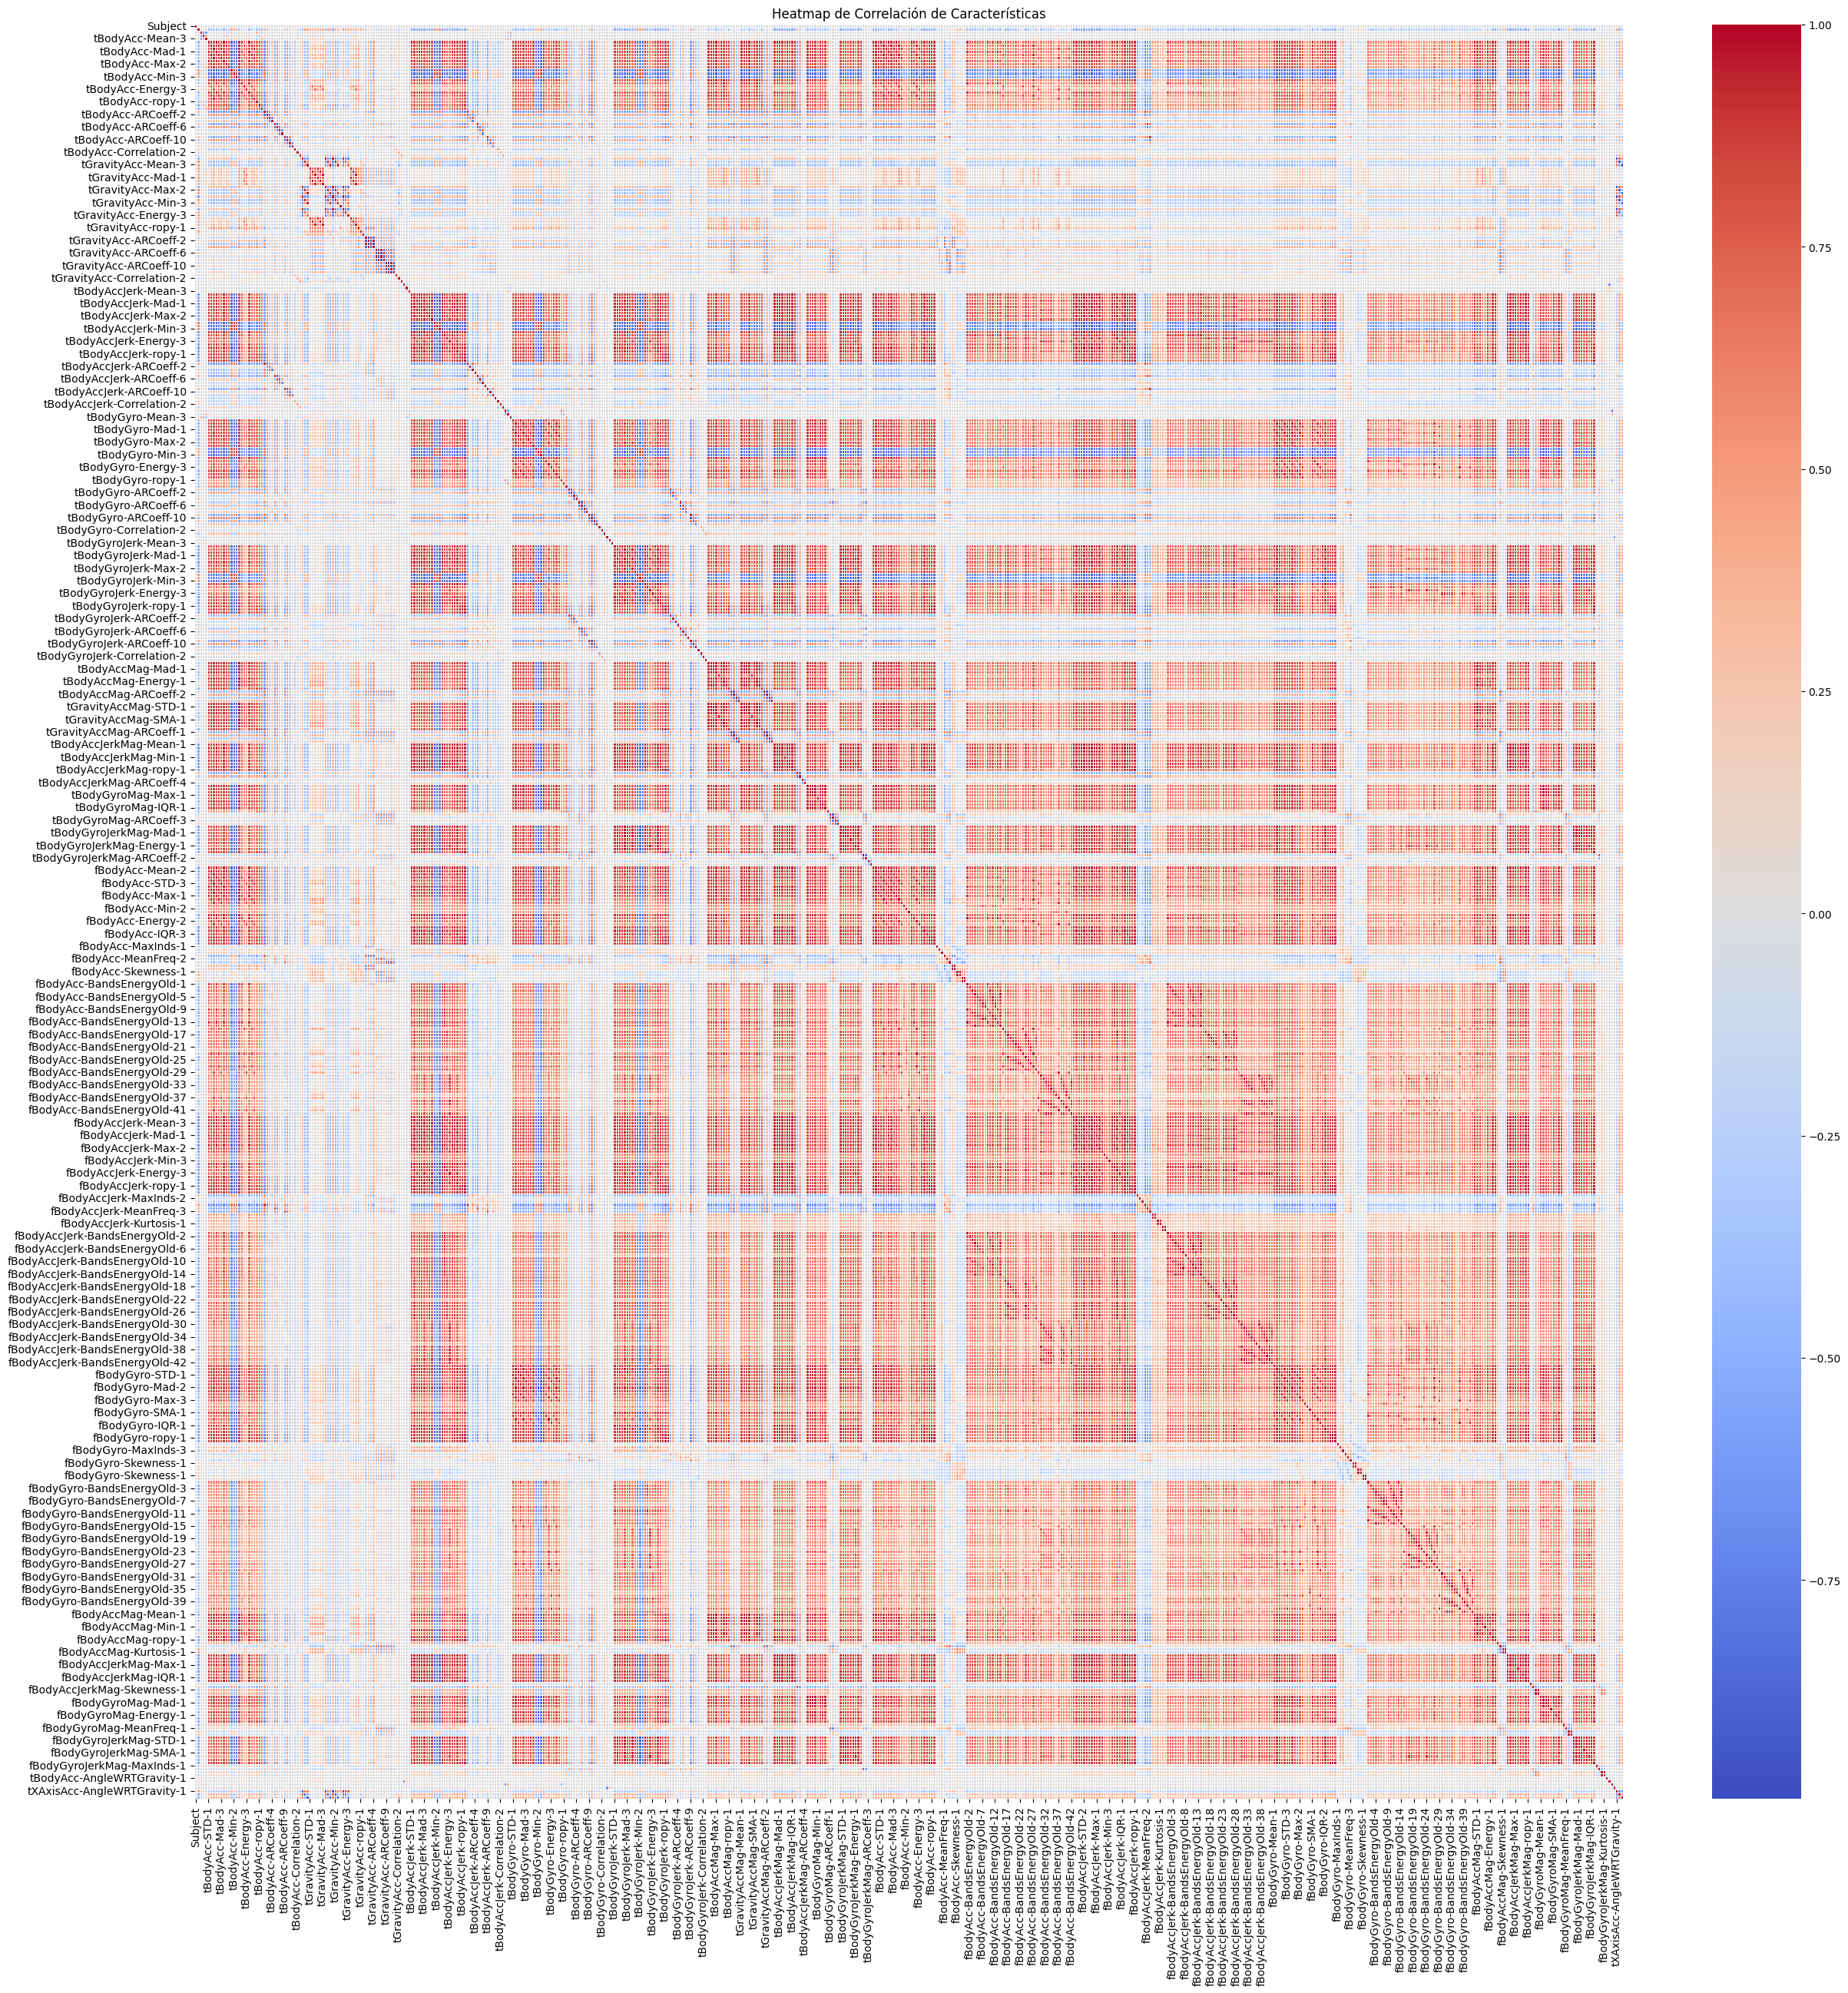

In [4]:
import matplotlib.pyplot as plt

# Supongamos que queremos el histograma de la característica 1
plt.hist(full_data.iloc[:, 2], bins=50, alpha=0.75)  # 'iloc[:, 2]' selecciona la primera característica sensorial
plt.title('Distribución de la Característica 1')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


import pandas as pd

# Asumiendo que 'features' contiene solo las columnas de datos de sensores de tu DataFrame
correlation_matrix = full_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración para mejorar la visualización
plt.figure(figsize=(30, 30))  # Ajusta el tamaño del gráfico según tus necesidades

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de Correlación de Características')
plt.show()


4. ¿Cuántas muestras existen en este dataset para cada posible actividad reconocida?
5. ¿Cuántas actividades fueron reconocidas para cada sujeto?
6. ¿Cuáles y cuantas fueron las actividades reconocidas para cada sujeto?

In [5]:

# Cargamos el mapeo de identificadores a nombres de actividades
activity_labels = pd.read_csv('/content/drive/MyDrive/PruebaTecnicaTIA/activity_labels.txt', delim_whitespace=True, header=None, index_col=0, names=['Activity'])

# Creamos un diccionario para mapear los ids de las actividades a sus nombres
activity_names = activity_labels['Activity'].to_dict()
stadisti_dataInfo = full_data
# Reemplazamos los ids numéricos en el DataFrame por los nombres
stadisti_dataInfo['Activity'] = stadisti_dataInfo['Activity'].map(activity_names)
# Número de muestras por actividad
activity_counts = stadisti_dataInfo['Activity'].value_counts()

# Número de actividades por sujeto
activity_by_subject = stadisti_dataInfo.groupby('Subject')['Activity'].nunique()

# Actividades reconocidas para cada sujeto
activities_per_subject = full_data.groupby('Subject')['Activity'].unique()

print(f"Existen como muestra por cada actividad = \n \n{activity_counts}")

print(f'Cantidad de  actividades reconocidas por sujeto = \n \n{activity_by_subject}')

print(f'Actividades reconocidas para cada sujeto = \n\n {activities_per_subject}')

Existen como muestra por cada actividad = 
 
Activity
STANDING              1979
LAYING                1958
SITTING               1801
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1407
STAND_TO_LIE           139
SIT_TO_LIE             107
LIE_TO_SIT              85
LIE_TO_STAND            84
STAND_TO_SIT            70
SIT_TO_STAND            33
Name: count, dtype: int64
Cantidad de  actividades reconocidas por sujeto = 
 
Subject
1     12
2     12
3     12
4     12
5     12
6     12
7     10
8     11
9     11
10    11
11    12
12    12
13    12
14    12
15    12
16    11
17    12
18    12
19    12
20    12
21    12
22    11
23    12
24    11
25    12
26    12
27    11
28    10
29    12
30    12
Name: Activity, dtype: int64
Actividades reconocidas para cada sujeto = 

 Subject
1     [STANDING, STAND_TO_SIT, SITTING, SIT_TO_STAND...
2     [STANDING, STAND_TO_SIT, SITTING, SIT_TO_STAND...
3     [STANDING, STAND_TO_SIT, SITTING, STAND_TO_LIE...
4     [STANDIN

# Tema 2 : Segmentacion de clientes RFM

Se requiere el desarrollo de un script que pueda ser utilizado para realizar una segmentación RFM (Recencia, Frecuencia y Valor Monetario) a los clientes que participan en un programa de fidelización en una tienda retail. RFM, es una técnica de segmentación del comportamiento de la cliente basada en datos. La idea es segmentar a los clientes en función de cuándo fue su última compra, con qué frecuencia compraron en el pasado y cuánto gastaron en general.


1. El script debe ser capaz de leer el archivo facturas_retail.csv. Dicho archivo contiene transacciones por cliente desde el año 2022, donde se especifica el total en unidades y pvp que contiene la factura.


In [6]:
import pandas as pd
import numpy as np


df_billRetail = pd.read_csv("/content/drive/MyDrive/PruebaTecnicaTIA/facturas_retail.csv",sep=';')#ruta facturas_retail.csv
df_billRetail.info()
df_billRetail.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121203 entries, 0 to 121202
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   fecha         121203 non-null  object 
 1   id_factura    121203 non-null  int64  
 2   id_cliente    121203 non-null  int64  
 3   tot_unidades  121203 non-null  int64  
 4   tot_pvp       121203 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.6+ MB


,fecha,id_factura,id_cliente,tot_unidades,tot_pvp
0,2022-04-06,29764000350163,601,1,2.19
1,2022-04-06,89755001332975,602,2,4.38
2,2022-04-06,72756000548415,603,2,6.46
3,2022-04-06,66755001019819,604,36,85.24
4,2022-04-06,108753000774218,605,6,30.93


Una vez teniendo el archivo dentro de un dataframe procedemos a realizar un de cierta manera una limpieza o preparacion de datos, que es el siguiente



2. Deberá calcular el score RFM por cliente, de preferencia en quintiles.

In [7]:
# Convertir la columna de 'fecha' a datetime
df_billRetail['fecha'] = pd.to_datetime(df_billRetail['fecha'])

# Calcular la fecha más reciente en el dataset para usar en el cálculo de recencia
fecha_maxima = df_billRetail['fecha'].max()

# Calcular Recencia, Frecuencia y Valor Monetario por cliente
rfm = df_billRetail.groupby('id_cliente').agg({
    'fecha': lambda x: (fecha_maxima - x.max()).days,  # Recencia
    'id_factura': 'count',  # Frecuencia
    'tot_pvp': 'sum'  # Valor Monetario
}).rename(columns={'fecha': 'Recencia', 'id_factura': 'Frecuencia', 'tot_pvp': 'Valor_Monetario'})

rfm.head()


,Recencia,Frecuencia,Valor_Monetario
id_cliente,,,
601,2,57,953.25
602,8,39,986.74
603,1,308,1296.96
604,286,2,100.09
605,2,63,994.55


Una vez obtenido la tabla RFM, procedemos a realizar la division de quintiles, dividos por la Recencia, es decir de los mas nuevos a mas antiguos para ser mas eficientes en la particion de la informacion.

In [8]:
# Calcular quintiles y asignar scores
quintiles = rfm.quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

# Función para asignar scores basados en quintiles (invertir para Recencia)
def asignar_score(x, col, quintiles):
    if col == 'Recencia':
        if x <= quintiles[col][0.2]:
            return 5
        elif x <= quintiles[col][0.4]:
            return 4
        elif x <= quintiles[col][0.6]:
            return 3
        elif x <= quintiles[col][0.8]:
            return 2
        else:
            return 1
    else:
        if x <= quintiles[col][0.2]:
            return 1
        elif x <= quintiles[col][0.4]:
            return 2
        elif x <= quintiles[col][0.6]:
            return 3
        elif x <= quintiles[col][0.8]:
            return 4
        else:
            return 5

# Aplicar la función de score a las columnas
rfm['R_Score'] = rfm['Recencia'].apply(asignar_score, args=('Recencia', quintiles))
rfm['F_Score'] = rfm['Frecuencia'].apply(asignar_score, args=('Frecuencia', quintiles))
rfm['M_Score'] = rfm['Valor_Monetario'].apply(asignar_score, args=('Valor_Monetario', quintiles))

# Combina los scores en una sola columna para simplificar la segmentación
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm['RFM_Score'].astype(str).astype(int)
rfm.head()



,Recencia,Frecuencia,Valor_Monetario,R_Score,F_Score,M_Score,RFM_Score
id_cliente,,,,,,,
601,2,57,953.25,5,5,5,555
602,8,39,986.74,5,5,5,555
603,1,308,1296.96,5,5,5,555
604,286,2,100.09,1,1,4,114
605,2,63,994.55,5,5,5,555


3. Según su criterio, ¿Cuántos clientes podrían ser considerados TOP? ¿Cuántos clientes podrían ser considerados como PERDIDOS? ¿Qué características RFM debería tener un cliente para obtener un score 555?

In [9]:

# Conteo de clientes en categorías específicas
clientes_top = rfm[rfm['RFM_Score'] == 555].shape[0]
clientes_perdidos = rfm[(rfm['R_Score'] == 1) & (rfm['F_Score'] == 1) & (rfm['M_Score'] == 1)].shape[0]

# Distribución de los scores RFM
distribucion_rfm = rfm['RFM_Score'].value_counts().sort_index()


print(f"Cantidad de clientes top = {clientes_top}")
print(f"Cantidad de clientes lost = {clientes_perdidos}")
print(distribucion_rfm)


#Los Caracteristicas para un cliente con sore 555, seria que compra con
#frecuencia en la tienda, una cantidad considerable de dinero, entonces con estas
#caracteristicas podremos decir que tiene dinero y le gustan nuestros productos.


Cantidad de clientes top = 853
Cantidad de clientes lost = 856
RFM_Score
111    856
112    364
113    128
114     25
115      2
      ... 
544    223
545    119
553     21
554    211
555    853
Name: count, Length: 111, dtype: int64


#Tema 3. Análisis de series de tiempo

Se requiere el desarrollo de un script que pueda ser utilizado para evaluar y comparar automáticamente el desempeño de varios métodos de modelamiento y pronóstico de series de tiempo.

In [10]:
#Series de tiempo
import pandas as pd

df_data = pd.read_csv('/content/drive/MyDrive/PruebaTecnicaTIA/serie.dat',header=None, names=['value'])#Ruta serie.dat
df_data.info()
df_data.head()# Mostrar las primeras filas de datos y la información básica para asegurar que están bien cargados
df_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   168 non-null    float64
dtypes: float64(1)
memory usage: 1.4 KB


,value
count,168.000000
mean,25.059310
std,2.318791
min,20.000000
25%,23.280750
50%,24.957000
75%,26.878750
max,30.000000


Seccionar los datos, como lo dice el enunciado.


In [11]:
# Calcular el punto de corte para el 80% de los datos (TRAIN) y 20% para TEST
cutoff = int(len(df_data) * 0.8)
train_data = df_data.iloc[:cutoff]
test_data = df_data.iloc[cutoff:]

# Verificar los tamaños de los conjuntos de TRAIN y TEST
train_data.shape, test_data.shape


((134, 1), (34, 1))

Vamos a proceder con el primer modelo con

In [12]:
# NAIVE Model
# Función para calcular el RMSE.
from sklearn.metrics import mean_squared_error
import numpy as np


def calculate_rmse(true_values, predictions):
    return np.sqrt(mean_squared_error(true_values, predictions))

# Repetir el último valor observado en el conjunto de entrenamiento para todas las predicciones
naive_last_value = train_data.iloc[-1]['value']
naive_predictions = np.repeat(naive_last_value, len(test_data))

# Calcular RMSE para el modelo NAIVE
naive_rmse = calculate_rmse(test_data['value'], naive_predictions)

naive_predictions[:5], naive_rmse


(array([24.848, 24.848, 24.848, 24.848, 24.848]), 3.022217641168194)

In [13]:
# SNAIVE Model - Usando el valor del mismo mes del año anterior como predicción
snaive_predictions = train_data['value'].iloc[-12:].values
snaive_predictions = np.tile(snaive_predictions, len(test_data)//12 + 1)[:len(test_data)]

# Calcular RMSE para el modelo SNAIVE
snaive_rmse = calculate_rmse(test_data['value'], snaive_predictions)

snaive_predictions[:12], snaive_rmse


(array([27.914, 26.975, 28.527, 27.139, 28.982, 28.169, 28.056, 29.136,
        26.291, 26.987, 26.589, 24.848]),
 0.8203307439147727)

In [14]:

from statsmodels.tsa.arima.model import ARIMA

# Ajuste del modelo STL con ARIMA en los residuales
# Ajuste del modelo ARIMA simple
arima_model = ARIMA(train_data['value'], order=(1, 1, 1))
arima_result = arima_model.fit()
arima_predictions = arima_result.forecast(steps=len(test_data))

# Calcular RMSE para ARIMA
arima_rmse = calculate_rmse(test_data['value'], arima_predictions)


arima_rmse



2.4178075259841916

In [15]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.forecasting.stl import STLForecast

# STL Model - Descomposición y ajuste con ARIMA en los residuales
stlf = STLForecast(train_data['value'], ARIMA, model_kwargs=dict(order=(1, 1, 1), trend='t'), seasonal=13, period=12)
stl_result = stlf.fit()
stl_predictions = stl_result.forecast(steps=len(test_data))

# Calcular RMSE para el modelo STL
stl_rmse = calculate_rmse(test_data['value'], stl_predictions)

stl_predictions[:5], stl_rmse



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(134    28.183182
 135    26.455268
 136    27.826906
 137    27.405732
 138    29.120340
 dtype: float64,
 0.7202310526725698)

In [16]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["NAIVE", "SNAIVE", "ARIMA", "STL"],
    "RMSE": [naive_rmse, snaive_rmse, arima_rmse, stl_rmse]
})
results = results.sort_values(by="RMSE")
results


,Model,RMSE
3,STL,0.720231
1,SNAIVE,0.820331
2,ARIMA,2.417808
0,NAIVE,3.022218


1. ¿Cuáles son sus motivaciones y aspiraciones para trabajar en el campo de la Ciencia de Datos?

Siempre me ha gustado agilitar y pronosticar procesos, soy bueno con las matematicas y ciencia de datos, es la conbinacion de matematicas y programacion. Quisiera en un futuro poder realizar una maestria y bootcamps de Ciencia de datos y poder gestionar proyectos.


2. ¿Por qué en una empresa Retail como TIA S.A.?

Por que el retail tiene una amplia gama de proyectos, y Tia tiene sucursales en todo el ecuador y es una empresa bien establecida que siempre estan innovando


3. Mencione dos proyectos relacionados con el sector Retail en los que le gustaría trabajar utilizando la Ciencia de Datos.

Me han llamado la antecion varios proyectos como:

**Comportamiento de pago del cliente para Credito directo.**


Saber a que tipo de cliente le dimos el credito, y poder decidir si agrandar el cupo o no



**Comportamiento de ventas de productos por epoca del año o lugar.**

Saber que producto por localidad se vende mas cada mes y pronosticar la cantidad de producto que vamos a necesitar cada mes para no tener problemas de stock.